<a href="https://colab.research.google.com/github/nwenewo/House_Prices_Prediction/blob/main/House_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Explore the Data

In [3]:
# Load the data
df = pd.read_csv('/content/house_price/train.csv')
# print(df.head())

In [4]:
# Quick overview
df.info()

# summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


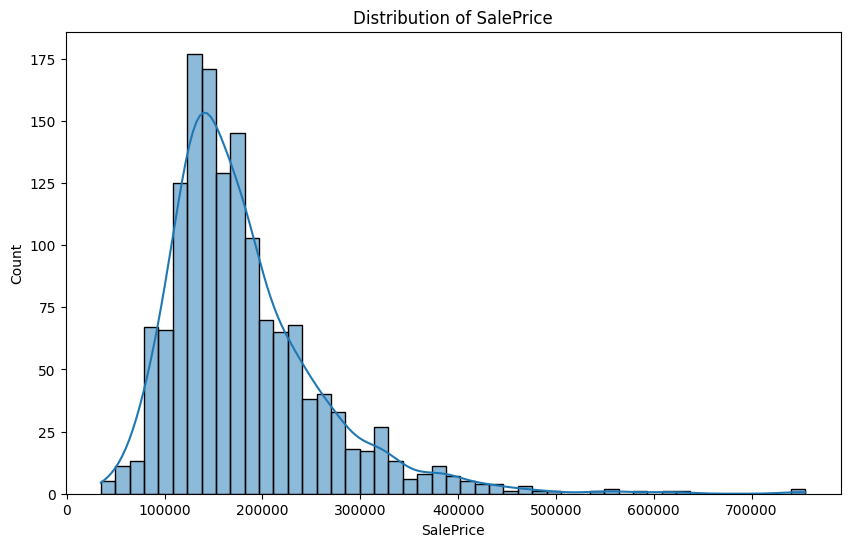

In [5]:
# check target variable distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()

Sale Price is usually right_skewed. I will log-transform it layer for better modeling.

# EDA - Key Insights

In [6]:
# correlation with SalesPrice (top 10)
correlations = df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)
print(correlations.head(11))

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


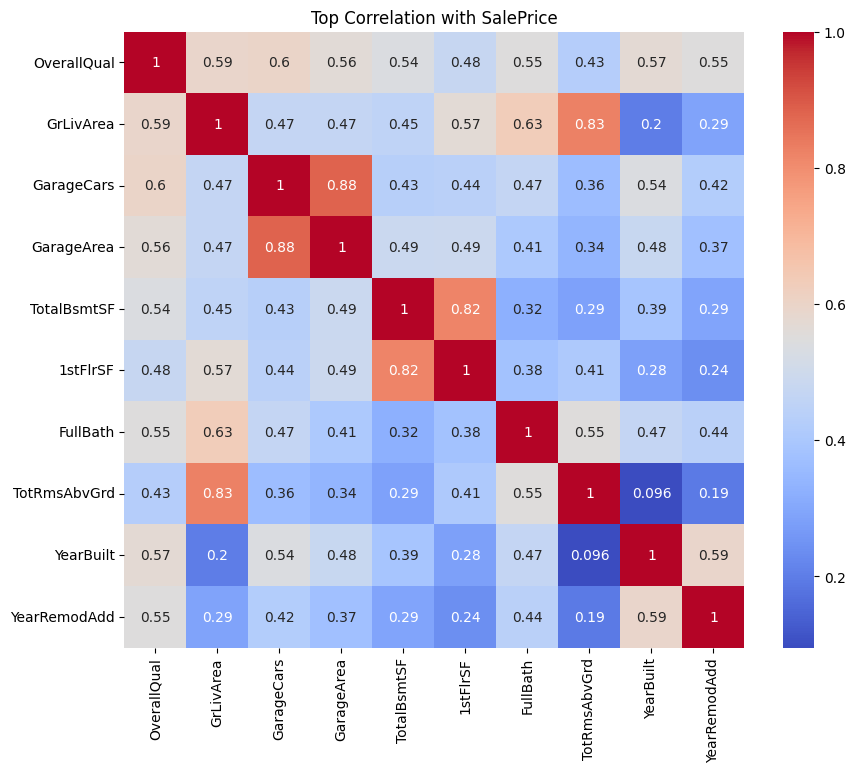

In [7]:
# visualize top correlations
top_features = correlations[1:11].index
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm')
plt.title('Top Correlation with SalePrice')
plt.show()

# Handling Missing Data

In [8]:
# percentage of missing values
missing = df.isnull().sum()
missing = missing[missing > 0]
missing_percent = (missing / len(df)) * 100
print(pd.DataFrame({'Missing Count': missing, 'Percentage': missing_percent}).sort_values('Percentage', ascending=False))

              Missing Count  Percentage
PoolQC                 1453   99.520548
MiscFeature            1406   96.301370
Alley                  1369   93.767123
Fence                  1179   80.753425
MasVnrType              872   59.726027
FireplaceQu             690   47.260274
LotFrontage             259   17.739726
GarageType               81    5.547945
GarageYrBlt              81    5.547945
GarageFinish             81    5.547945
GarageQual               81    5.547945
GarageCond               81    5.547945
BsmtExposure             38    2.602740
BsmtFinType2             38    2.602740
BsmtQual                 37    2.534247
BsmtCond                 37    2.534247
BsmtFinType1             37    2.534247
MasVnrArea                8    0.547945
Electrical                1    0.068493


# Data Cleaning and Feature Engineering

In [9]:
print(df.shape)

(1460, 81)


In [10]:
# Numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Numerical colums:", len(numerical_cols))
print("Categorical columns:", len(categorical_cols))

Numerical colums: 38
Categorical columns: 43


In [11]:
# Features where NaN means "None" or "No feature"
none_impute_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                    'BsmtFinType2', 'MasVnrType', 'MSSubClass']

for col in none_impute_cols:
    df[col] = df[col].fillna('None')

# For Masonry veneer area, NaN likely means 0 area
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

# LotFrontage: fill with median by neighborhood (more accurate than overall median)
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# GarageYrBlt: fill with YearBuilt (or median)
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['YearBuilt'])

# Electrical: only 1 missing → fill with most common
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

# Check if any missing left
print(df.isnull().sum().sum())

0


In [12]:
# Total square footage
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

# Total bathrooms
df['TotalBath'] = df['FullBath'] + 0.5 * df['HalfBath'] + df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']

# House age and remodel age
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']

# Has porch?
df['HasPorch'] = (df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch'] > 0).astype(int)

# Overall quality * living area (interaction feature)
df['QualGrLivArea'] = df['OverallQual'] * df['GrLivArea']

# Target Transformation (SalePrice is skewed)

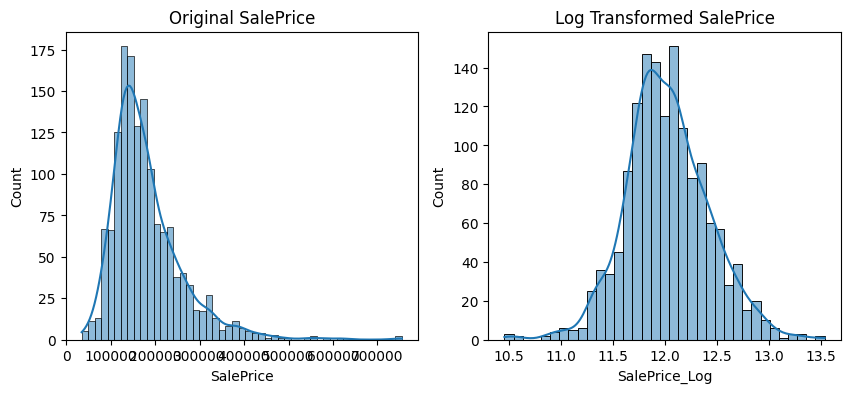

In [13]:
# Log transform SalePrice (improves linearity and model performance)
df['SalePrice_Log'] = np.log1p(df['SalePrice'])

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['SalePrice'], kde=True)
plt.title('Original SalePrice')

plt.subplot(1, 2, 2)
sns.histplot(df['SalePrice_Log'], kde=True)
plt.title('Log Transformed SalePrice')
plt.show()

# Encoding Categorical Variables

In [14]:
from sklearn.preprocessing import LabelEncoder

df_model = df.copy()

for col in categorical_cols:
  if df_model[col].dtype == 'object':
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))

# Modeling

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Features: Drop ID, original SalePrice (use log), and any irrelevant
X = df_model.drop(['Id', 'SalePrice', 'SalePrice_Log'], axis=1)
y = df_model['SalePrice_Log']  # Target

# Split: 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(1168, 85) (292, 85)


# Baseline: Linear Regression

In [16]:
# Train
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict and Evaluate
y_pred_lr = lr.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f'Linear Regression RMSE: {rmse_lr:.4f}')

Linear Regression RMSE: 0.1524


# Random Forest (Better for Non-Linear data)

In [17]:
# train (basic params)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# predict and evaluate
y_pred_rf = rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'Random Forest RMSE: {rmse_rf:.4f}')

Random Forest RMSE: 0.1446


# XGBoost

In [28]:
# Improved XGBoost with early stopping via callbacks
from xgboost import callback

# Define early stopping callback
es = callback.EarlyStopping(
    rounds=50,
    save_best=True,
    metric_name='rmse',  # Assuming RMSE; change if using another metric
    data_name='validation_0'  # Default name for the first eval_set
)

xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,          # Allow more trees
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    callbacks=[es]
)

# Fit with eval_set
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f'XGBoost RMSE: {rmse_xgb:.4f}')

# Feature importance (top 10)
importances = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances.head(10))

XGBoost RMSE: 0.1355
QualGrLivArea    0.191668
OverallQual      0.173184
TotalSF          0.088380
GarageCars       0.057111
CentralAir       0.053887
GarageQual       0.037883
TotalBath        0.022598
KitchenQual      0.020192
ExterQual        0.019967
HouseAge         0.019583
dtype: float32


# Visualize predictions

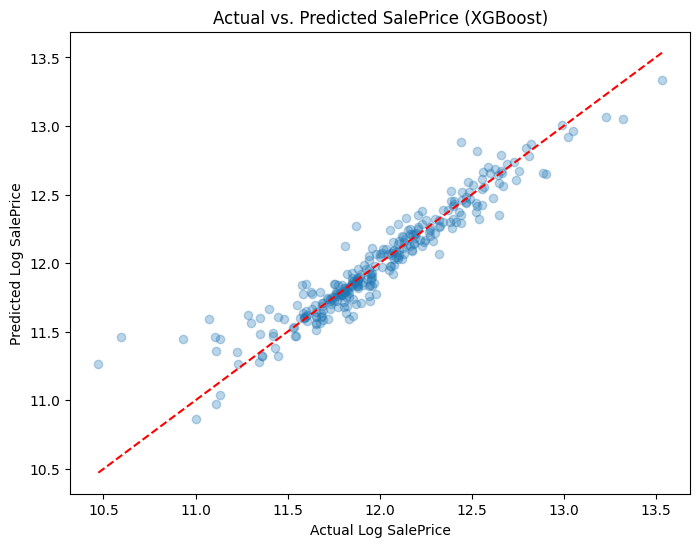

In [29]:
# plot actual vs predicted for XGBoost
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Log SalePrice')
plt.ylabel('Predicted Log SalePrice')
plt.title('Actual vs. Predicted SalePrice (XGBoost)')
plt.show()

In [30]:
# @title
# Use the improved xgb_model
df['Predicted_SalePrice_Log'] = xgb_model.predict(X)  # Full train set
df['Predicted_SalePrice'] = np.expm1(df['Predicted_SalePrice_Log'])
df['Actual_SalePrice'] = df['SalePrice']
df['Prediction_Error'] = df['Predicted_SalePrice'] - df['Actual_SalePrice']

# Update dashboard data
dashboard_data = df[['Id', 'Neighborhood', 'OverallQual', 'GrLivArea', 'TotalSF', 'YearBuilt',
                     'Actual_SalePrice', 'Predicted_SalePrice', 'Prediction_Error']].copy()
dashboard_data[['Actual_SalePrice', 'Predicted_SalePrice', 'Prediction_Error']] = dashboard_data[
    ['Actual_SalePrice', 'Predicted_SalePrice', 'Prediction_Error']].round(0)
dashboard_data.to_csv('house_prices_dashboard_data.csv', index=False)

from google.colab import files
files.download('house_prices_dashboard_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>